In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [84]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [85]:
# initial data
data_init = lambda name: pd.read_csv(f'data/{name}_data.csv')

df_train = data_init('train')
df_test = data_init('test')

df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.38 MB
Decreased by 60.9%


In [86]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   category
 1   Annual Income                 5943 non-null   float32 
 2   Years in current job          7129 non-null   category
 3   Tax Liens                     7500 non-null   float32 
 4   Number of Open Accounts       7500 non-null   float32 
 5   Years of Credit History       7500 non-null   float32 
 6   Maximum Open Credit           7500 non-null   float32 
 7   Number of Credit Problems     7500 non-null   float32 
 8   Months since last delinquent  3419 non-null   float32 
 9   Bankruptcies                  7486 non-null   float32 
 10  Purpose                       7500 non-null   category
 11  Term                          7500 non-null   category
 12  Current Loan Amount           7500 non-null   fl

In [88]:
# Check proportionality
df_train.shape[1] - df_test.shape[1] == 1

True

### <<<<<< Categorical in Num-category

### Nan

In [89]:
# 5 columns with NaN: [
#   'Annual Income',
#   'Years in current job',
#   'Months since last delinquent',
#   'Bankruptcies',
#   'Credit Score'
# ]
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [90]:
def change_on_median(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].median()

def change_on_frequent(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].value_counts().index[0]

#### 1. Column: Annual Income  (numerical)

In [91]:
df_train['Annual Income'].head(6)

0     482087.0
1    1025487.0
2     751412.0
3     805068.0
4     776264.0
5          NaN
Name: Annual Income, dtype: float32

In [92]:
# 'Annual Income' == NaN => median
change_on_median('Annual Income')
df_train['Annual Income'].isna().sum()
#df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()

0

#### 2. Column: Years in current job  (categorical)

In [93]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [94]:
# 'Years in current job' == NaN => most frequent  ()
change_on_frequent('Years in current job')
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [95]:
#### 3. Column: Months since last delinquent (numerical)
df_train['Months since last delinquent'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Months since last delinquent, dtype: float32

In [96]:
change_on_median('Months since last delinquent')
df_train['Months since last delinquent'].isna().sum()

0

#### 4. Column: Bankruptcies  (categorical)

In [97]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [98]:
# 'Bankruptcies' == NaN => most frequent  ()
change_on_frequent('Bankruptcies')
df_train['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

#### 5. Column: Credit Score  (numerical)

In [99]:
df_train['Credit Score'].head(6)

0    749.0
1    737.0
2    742.0
3    694.0
4    719.0
5      NaN
Name: Credit Score, dtype: float32

In [100]:
# 'Credit Score' == NaN => median
change_on_median('Credit Score')
df_train['Credit Score'].isna().sum()

0

### Correlation

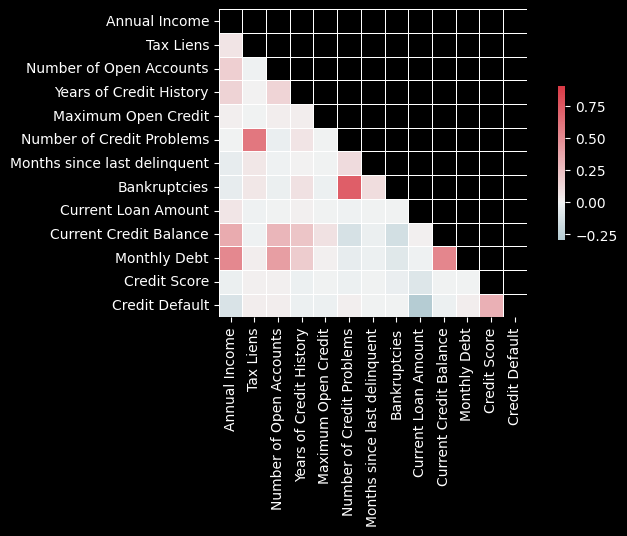

In [118]:
corr = df_train.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig('./images/train_corrs.png', dpi=300)

In [119]:
print(corr['Credit Default'].sort_values(ascending = False),'\n')

Credit Default                  1.000000
Credit Score                    0.320712
Number of Open Accounts         0.029016
Tax Liens                       0.026547
Monthly Debt                    0.022772
Number of Credit Problems       0.021459
Bankruptcies                    0.002416
Months since last delinquent    0.001510
Years of Credit History        -0.017888
Maximum Open Credit            -0.018892
Current Credit Balance         -0.019414
Annual Income                  -0.111614
Current Loan Amount            -0.295939
Name: Credit Default, dtype: float64 



In [122]:
# Feature with more strong correlation
print(corr['Number of Credit Problems'].sort_values(ascending = False), '\n')

Number of Credit Problems       1.000000
Bankruptcies                    0.720913
Tax Liens                       0.600440
Months since last delinquent    0.106425
Years of Credit History         0.070031
Credit Default                  0.021459
Annual Income                   0.001684
Maximum Open Credit            -0.005629
Current Loan Amount            -0.009683
Credit Score                   -0.019777
Number of Open Accounts        -0.026473
Monthly Debt                   -0.041514
Current Credit Balance         -0.128064
Name: Number of Credit Problems, dtype: float64 



### Emissions

In [124]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')

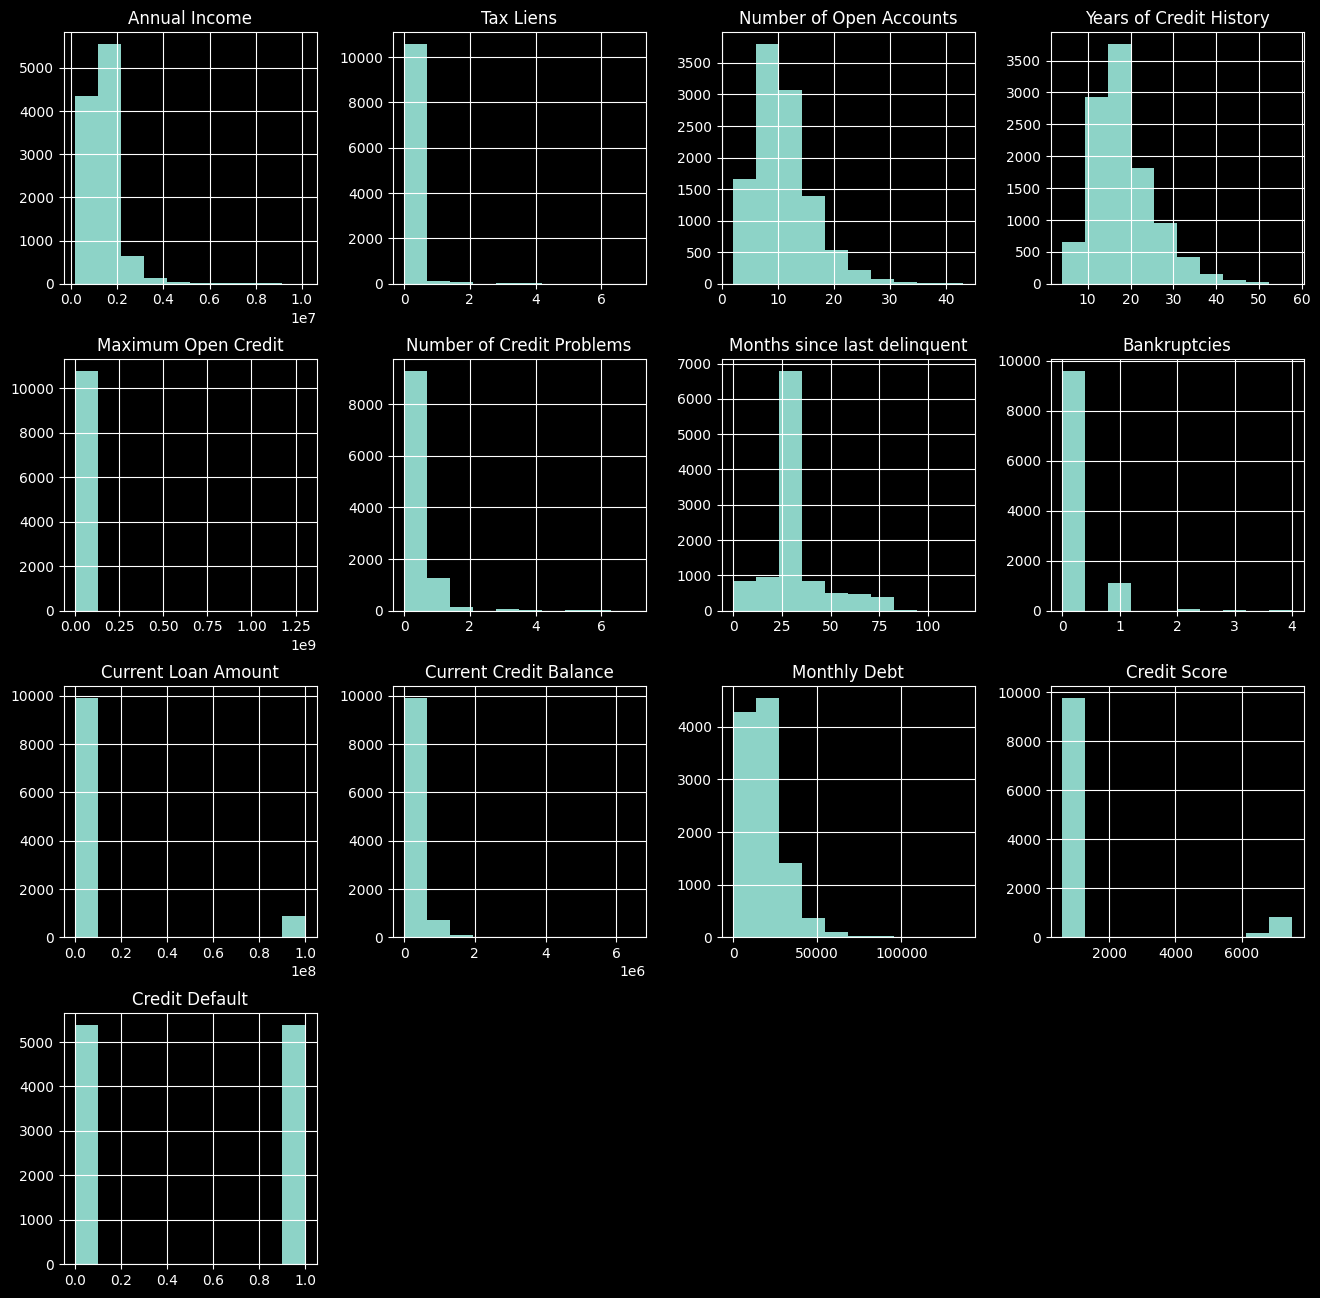

In [126]:
df_train[numeric_features.columns].hist(figsize=(16, 16))
plt.show()

### Balancing classes

In [102]:
target_name = 'Credit Default'

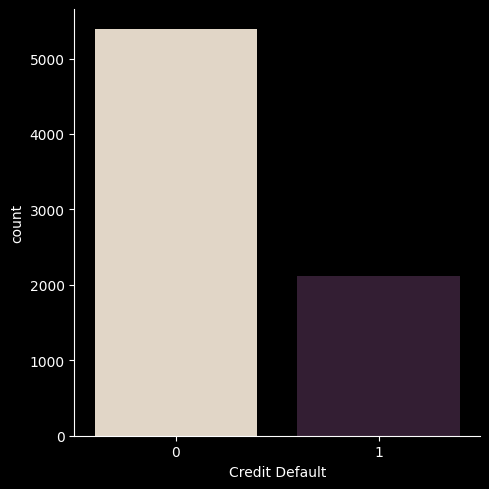

In [103]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

We observe an imbalance of classes. Let's create a balancing function.

In [104]:
def balancing_target(data, target_name):
    target_counts = data[target_name].value_counts()

    big_cls = target_counts.argmax()
    min_cls = target_counts.argmin()

    # imbalance coef
    ratio = (target_counts[big_cls] / target_counts[min_cls])

    # integer value => ratio of big_class / small_class
    iters = int(ratio)

    for i in range(iters):
        # balancing classes
        sample = data[data[target_name] == min_cls].sample(int(target_counts[min_cls] * ((ratio % 1) if (i == iters - 1) else 1)))
        data = pd.concat([data, sample], axis=0, ignore_index=True)

    return data.sample(frac=1)

In [105]:
df_train = balancing_target(df_train, target_name)
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4401,Rent,1168386.0,10+ years,0.0,7.0,25.100000,211090.0,1.0,32.0,1.0,debt consolidation,Short Term,251922.0,108661.0,7999.0,731.0,0
10741,Rent,1168386.0,7 years,0.0,11.0,15.200000,196724.0,0.0,54.0,0.0,debt consolidation,Short Term,276870.0,114513.0,23145.0,731.0,1
7211,Home Mortgage,1135991.0,8 years,0.0,10.0,16.799999,379390.0,0.0,6.0,0.0,debt consolidation,Short Term,443784.0,283423.0,14673.0,7340.0,1
9652,Home Mortgage,1035177.0,10+ years,0.0,6.0,13.200000,246224.0,0.0,32.0,0.0,debt consolidation,Short Term,191774.0,188195.0,7229.0,7310.0,1
3871,Home Mortgage,984998.0,2 years,0.0,16.0,11.700000,1017830.0,0.0,32.0,0.0,debt consolidation,Long Term,402534.0,482581.0,17648.0,687.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,Rent,1548576.0,9 years,0.0,12.0,17.000000,490512.0,0.0,32.0,0.0,debt consolidation,Short Term,560340.0,280877.0,11059.0,698.0,0
4552,Home Mortgage,982338.0,8 years,0.0,10.0,18.799999,238326.0,1.0,32.0,1.0,debt consolidation,Long Term,343376.0,182362.0,26686.0,721.0,0
6643,Rent,1505256.0,< 1 year,0.0,13.0,27.200001,550726.0,1.0,57.0,1.0,debt consolidation,Short Term,217866.0,181222.0,22202.0,700.0,0
2969,Rent,3408505.0,10+ years,0.0,6.0,11.600000,86570.0,0.0,27.0,0.0,other,Short Term,256652.0,5453.0,34085.0,6590.0,1


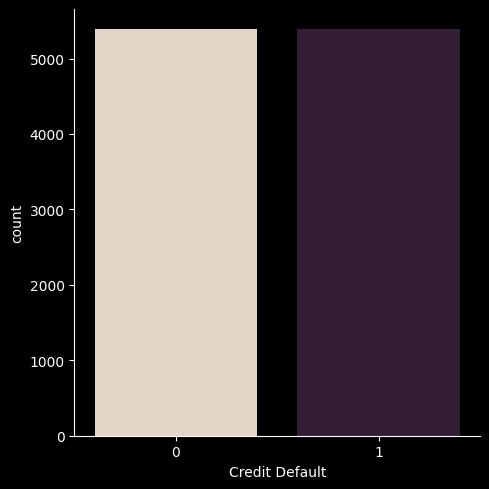

In [106]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

### Splitting data

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
target = df_train['Credit Default']
data = df_train.drop(['Credit Default'], axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [110]:
X_train.shape

(8618, 16)

### Normalization

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
# scaler = MinMaxScaler()
# scaler.fit(df_train)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10773 entries, 4401 to 10022
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                10773 non-null  category
 1   Annual Income                 10773 non-null  float32 
 2   Years in current job          10773 non-null  category
 3   Tax Liens                     10773 non-null  float32 
 4   Number of Open Accounts       10773 non-null  float32 
 5   Years of Credit History       10773 non-null  float32 
 6   Maximum Open Credit           10773 non-null  float32 
 7   Number of Credit Problems     10773 non-null  float32 
 8   Months since last delinquent  10773 non-null  float32 
 9   Bankruptcies                  10773 non-null  float32 
 10  Purpose                       10773 non-null  category
 11  Term                          10773 non-null  category
 12  Current Loan Amount           10773 non-nul

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')